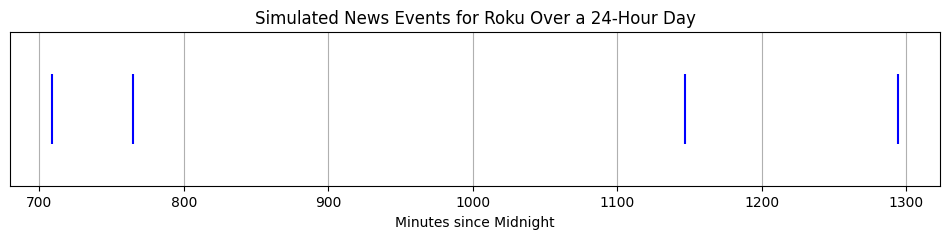

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the total number of minutes in a day
minutes_per_day = 1440

# Define the time-dependent rate function
def rate_function(minute):
    hour = (minute // 60) % 24
    if 9 <= hour < 17:
        return 0.005  # Higher rate during business hours
    elif 7 <= hour < 9 or 17 <= hour < 20:
        return 0.002  # Moderate rate during early morning and evening
    else:
        return 0.0005  # Lower rate during night

# Generate the rate for each minute
rates = np.array([rate_function(minute) for minute in range(minutes_per_day)])

# Simulate news events
# np.random.seed(42)  # For reproducibility
news_events = np.random.rand(minutes_per_day) < rates

# Extract the times when news events occur
event_times = np.where(news_events)[0]

# Plotting the news events over the day
plt.figure(figsize=(12, 2))
plt.eventplot(event_times, orientation='horizontal', colors='blue')
plt.title("Simulated News Events for Roku Over a 24-Hour Day")
plt.xlabel("Minutes since Midnight")
plt.yticks([])
plt.grid(True)
plt.show()


          date  event_count
0   2025-04-22            1
1   2025-04-23            2
2   2025-04-24            3
3   2025-04-25            3
4   2025-04-26            3
5   2025-04-27            6
6   2025-04-28            3
7   2025-04-29            2
8   2025-04-30            2
9   2025-05-01            1
10  2025-05-02            5
11  2025-05-03            3
12  2025-05-04            1
13  2025-05-05            3
14  2025-05-06            2
15  2025-05-07            4
16  2025-05-08            1


C:\Users\MSI\AppData\Local\Temp\ipykernel_20060\2641680647.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start=start_time, periods=total_minutes, freq='T')


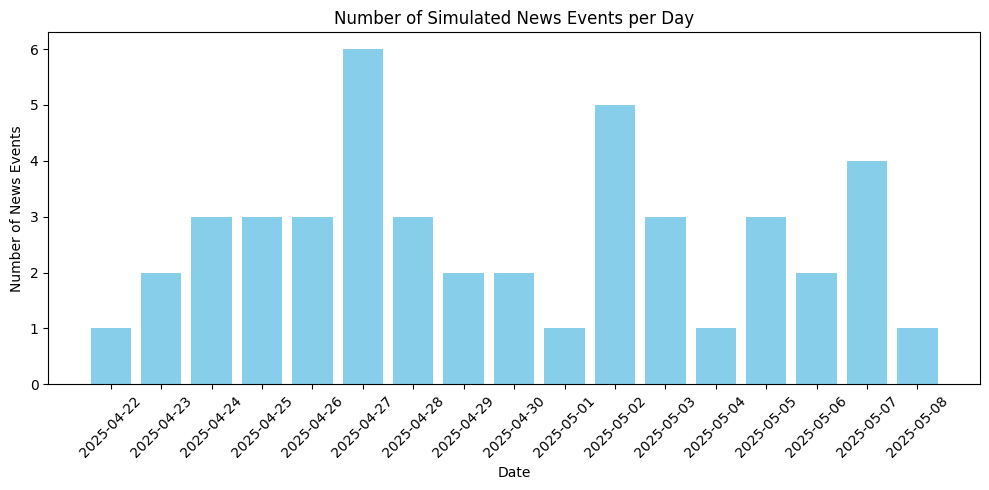

In [18]:
import pandas as pd


# Parameters
days = 17  # Number of days to simulate
minutes_per_day = 1440  # Total minutes in a day
total_minutes = days * minutes_per_day

# Define a time-dependent rate function
def rate_function(minute_of_day):
    hour = (minute_of_day // 60) % 24
    if 9 <= hour < 17:
        return 0.005  # Higher probability during business hours
    elif 7 <= hour < 9 or 17 <= hour < 20:
        return 0.002  # Moderate probability during early morning and evening
    else:
        return 0.0005  # Lower probability during night

# Generate the rate for each minute
rates = np.array([rate_function(minute % minutes_per_day) for minute in range(total_minutes)])

# Simulate news events: 1 if news occurs, 0 otherwise
np.random.seed(42)  # For reproducibility
news_events = np.random.rand(total_minutes) < rates

# Generate timestamps for each minute
start_time = pd.Timestamp('2025-04-22 00:00:00')
timestamps = pd.date_range(start=start_time, periods=total_minutes, freq='T')

# Create a DataFrame with timestamps and news events
df = pd.DataFrame({'timestamp': timestamps, 'news_event': news_events})

# Filter rows where a news event occurred
news_df = df[df['news_event']].copy()

# Count the number of news events per day
news_df['date'] = news_df['timestamp'].dt.date
daily_counts = news_df.groupby('date').size().reset_index(name='event_count')

# Display the daily counts
print(daily_counts)

# Plotting the number of news events per day
plt.figure(figsize=(10, 5))
plt.bar(daily_counts['date'].astype(str), daily_counts['event_count'], color='skyblue')
plt.title('Number of Simulated News Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of News Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
